# Custom Training Basics

> In this post, you'll gain a basic understanding of building custom training loops.  This is the summary of lecture "Custom and Distributed Training with Tensorflow" from DeepLearning.AI.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Coursera, Tensorflow, DeepLearining.AI]
- image: 

## Packages

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Define Model

You define your model as a class. 
- `x` is your input tensor. 
- The model should output values of **wx+b**. 
- You'll start off by initializing w and b to random values. 
- During the training process, values of w and b get updated in accordance with linear regression so as to minimize the loss incurred by the model. 
- Once you arrive at optimal values for w and b, the model would have been trained to correctly predict the values of wx+b.

Hence, 
- **w** and **b** are trainable weights of the model. 
- **x** is the input
- **y** = wx + b is the output

In [2]:
class Model(object):
    def __init__(self):
        '''
        Initialize the weights to `2.0` and the bias to `1.0`
        In practice, these should be initialized to random values (for example, with `tf.random.normal`)
        '''
        self.w = tf.Variable(2.0)
        self.b = tf.Variable(1.0)
        
    def __call__(self, x):
        return self.w * x + self.b

In [3]:
model = Model()

### Define a loss function

A loss function measures how well the output of a model for a given input matches the target output. 
- The goal is to minimize this difference during training. 
- Let's use the standard L2 loss, also known as the least square errors
$$Loss = \sum_{i} \left (y_{pred}^i - y_{target}^i \right )^2$$

In [4]:
def loss(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

### Obtain training data

First, synthesize the training data using the "true" w and "true" b. 

$$y = w_{true} \times x + b_{true} $$

In [5]:
TRUE_w = 3.0
TRUE_b = 2.0
NUM_SAMPLES = 1000

xs = tf.random.normal(shape=[NUM_SAMPLES])
ys = (TRUE_w * xs) + TRUE_b

Before training the model, visualize the loss value by plotting the model's predictions in red crosses and the training data in blue dots:

In [6]:
def plot_data(inputs, outputs, predicted_outputs):
    real = plt.scatter(inputs, outputs, c='b', marker='.')
    predicted = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
    plt.legend((real, predicted), ('Real Data', 'Predicted Data'))
    plt.show()

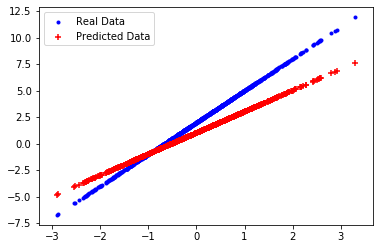

In [7]:
plot_data(xs, ys, model(xs))

In [8]:
print('Current Loss: %1.6f' %loss(model(xs), ys).numpy())

Current Loss: 2.118093


### Define a training loop

With the network and training data, train the model using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) 
- Gradient descent updates the trainable weights **w** and **b** to reduce the loss. 


There are many variants of the gradient descent scheme that are captured in `tf.train.Optimizer`—our recommended implementation. In the spirit of building from first principles, here you will implement the basic math yourself.
- You'll use `tf.GradientTape` for automatic differentiation
- Use `tf.assign_sub` for decrementing a value.  Note that assign_sub combines `tf.assign` and `tf.sub`

In [9]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss(model(inputs), outputs)
    # calculate Gradient of each variable
    dw, db = tape.gradient(current_loss, [model.w, model.b])
    
    # update variables with Gradient descent
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    
    return current_loss

Finally, you can iteratively run through the training data and see how `w` and `b` evolve.

In [10]:
model = Model()

# Collect the history of W-values and b-values to plot later
list_w, list_b = [], []
epochs = range(15)
losses = []

for epoch in epochs:
    list_w.append(model.w.numpy())
    list_b.append(model.b.numpy())
    current_loss = train(model, xs, ys, learning_rate=0.1)
    losses.append(current_loss)
    print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' % (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=2.00 b=1.00, loss=2.11809
Epoch  1: w=2.21 b=1.21, loss=1.31585
Epoch  2: w=2.38 b=1.38, loss=0.81747
Epoch  3: w=2.51 b=1.51, loss=0.50785
Epoch  4: w=2.61 b=1.61, loss=0.31550
Epoch  5: w=2.70 b=1.70, loss=0.19600
Epoch  6: w=2.76 b=1.76, loss=0.12176
Epoch  7: w=2.81 b=1.81, loss=0.07565
Epoch  8: w=2.85 b=1.85, loss=0.04699
Epoch  9: w=2.88 b=1.88, loss=0.02920
Epoch 10: w=2.91 b=1.91, loss=0.01814
Epoch 11: w=2.93 b=1.93, loss=0.01127
Epoch 12: w=2.94 b=1.94, loss=0.00700
Epoch 13: w=2.95 b=1.95, loss=0.00435
Epoch 14: w=2.96 b=1.96, loss=0.00270


In addition to the values for losses, you also plot the progression of trainable variables over epochs.

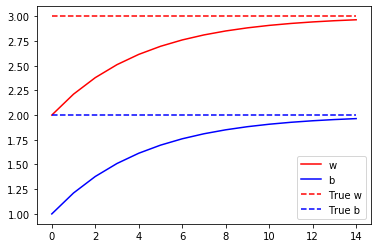

In [11]:
plt.plot(epochs, list_w, 'r',
       epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--',
      [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

## Plots for Evaluation
Now you can plot the actual outputs in red and the model's predictions in blue on a set of random test examples.

You can see that the model is able to make predictions on the test set fairly accurately.

In [13]:
test_inputs = tf.random.normal(shape=[NUM_SAMPLES])
test_outputs = test_inputs * TRUE_w + TRUE_b

predicted_test_outputs = model(test_inputs)

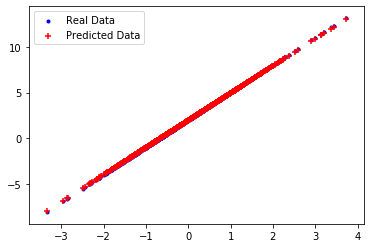

In [14]:
plot_data(test_inputs, test_outputs, predicted_test_outputs)

Visualize the cost function against the values of each of the trainable weights the model approximated to over time.

In [15]:
def plot_loss_for_weights(weights_list, losses):
    for i, weights in enumerate(weights_list):
        plt.subplot(120 + i + 1)
        plt.plot(weights['values'], losses, 'r')
        plt.plot(weights['values'], losses, 'bo')
        plt.xlabel(weights['name'])
        plt.ylabel('Loss')

In [17]:
weights_list = [
    {
        'name': 'w',
        'values': list_w
    },
    {
        'name': 'b',
        'values': list_b
    }
]

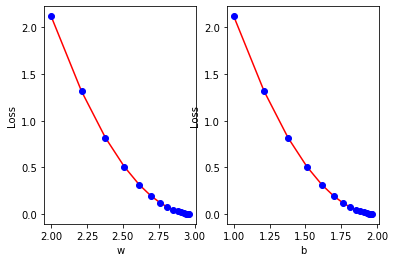

In [18]:
plot_loss_for_weights(weights_list, losses)